In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

In [2]:
x = np.linspace(0,1000,1000)
length_of_pulse = 10

In [3]:
def input_shape(x:float) -> float:
    return np.exp(-(x-length_of_pulse/2)**2/(length_of_pulse/5)**2)

In [4]:
y = input_shape(x)

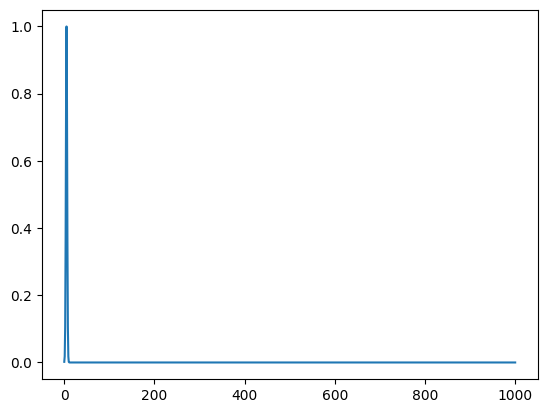

In [5]:
plt.plot(x,y)

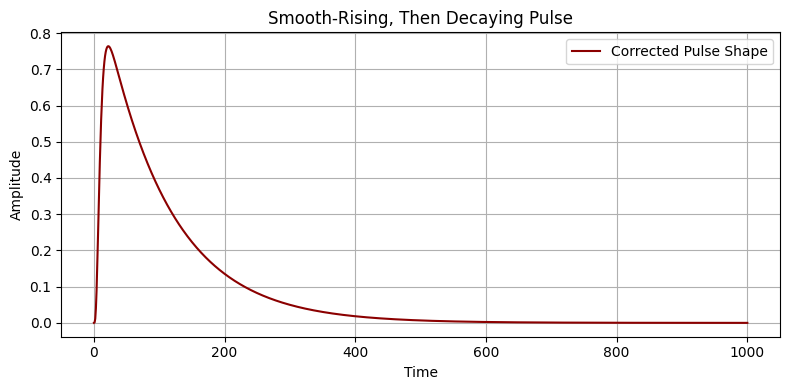

In [13]:
def corrected_input_pulse_vec(time: np.ndarray, start_time: float, rise_time: float, decay_time: float) -> np.ndarray:
    """
    Generates a pulse that rises smoothly and then decays exponentially.
    """
    time_shifted = time - start_time
    pulse = np.exp(-time_shifted / decay_time) * (1 - np.exp(-time_shifted / rise_time))**4
    pulse = pulse * (time >= start_time)  # Apply Heaviside
    return pulse

start_time = 0.0
rise_time = 5
decay_time = 100.0
corrected_pulse = corrected_input_pulse_vec(x, start_time, rise_time, decay_time)

plt.figure(figsize=(8, 4))
plt.plot(x, corrected_pulse, label='Corrected Pulse Shape', color='darkred')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Smooth-Rising, Then Decaying Pulse')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

